## Introduction.

The Rebrickable database includes data on every LEGO set that has ever been sold; the names of the sets, which bricks they contain, what color the bricks are, etc. This Project analyzes a fascinating dataset on every single logo block that has ever been built!.

## Reading data.

A comprehensive database of lego blocks is provided by [Rebrickable](https://Rebrickable.com/downloads/). The data is available as csv files and the schema is shown below. ![Schema Diagram for LEGO data files](datasets/lego_schema.png)

In [1]:
#Reading in the colors dataset to get a sense of the diversity of the lego sets

#Import modules
import pandas as pd

#Read colors data
colors = pd.read_csv('datasets/lego_colors.csv')

#Print the first few rows
colors.head()


,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## Exploring Colors

Now that the colors dataset has been read, we start exploring it!
Let us start by understanding the number of colors available.

In [2]:
# How many distinct colors are available?
num_colors = colors.name.count()
print(num_colors)

179


## Transparent Colors in Lego Sets

The colors data has a column named is_trans that indicates whether a color is transparent or not.
Let's explore the distribution of transparent vs. non-transparent colors.

In [3]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()

print(colors_summary)

           id  name  rgb
is_trans                
f         151   151  151
t          28    28   28


## Explore Lego Sets

Another interesting dataset available in this database is the sets data.
It contains a comprehensive list of lego sets over the years and the number of parts that each of these sets contained. 

Lets use this data to explore how the average number of parts in Lego sets haas varied over the years.

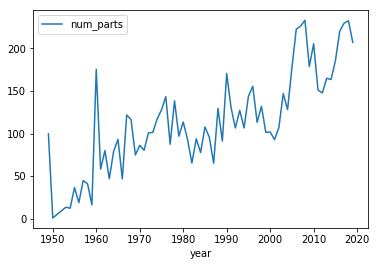

In [5]:
%matplotlib inline
# Read sets data as `sets`
sets = pd.read_csv('datasets/lego_sets.csv')

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets[['year', 'num_parts']].groupby('year', as_index = False).mean()

# Plot trends in average number of parts by year
parts_by_year.plot(x = 'year' , y = 'num_parts')

## Lego Themes Over Years

Lego blocks ship under multiple [themes](https://shop.lego.com/en-US/Themes). Let's try to get a sense of how the number of themes shipped has varied over the years

In [6]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets[['year', 'theme_id']].groupby('year', as_index = False).sum()
themes_by_year.head(6)

,year,theme_id
0,1949,1837
1,1950,2226
2,1953,1479
3,1954,5196
4,1955,10519
5,1956,4953
